# Saurabh Dadhich  
### Indian Institute of Technology,Roorkee 


# Object detection with YOLO using OpenCV

# Introduction:

When it comes to deep learning-based object detection there are three primary object detection methods that you’ll likely encounter:

Faster R-CNNs  
You Only Look Once (YOLO)         
Single Shot Detectors (SSDs)

In this we will use YOLO and pre-trained weights and model on COCO dataset. 

### Import required packages: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

### Load  yolov3.weights, yolov3.cfg and coco.names file:

In [2]:
yolov3_weights_path = "F:\Spark foundation\Object Detection\yolov3.weights"
yolov3_cfg_path = "F:\Spark foundation\Object Detection\yolov3.cfg"
coco_names_path = "F:\Spark foundation\Object Detection\coco.names"


#Load Yolo
net=cv2.dnn.readNet(yolov3_weights_path,yolov3_cfg_path)

#Load classes 
classes=[]

with open(coco_names_path,"r") as f: 
    classes=[obj.strip() for obj in f.readlines()]
     
        
print("Classes: ","\n")
print(classes,"\n")
print("Total Number of Classes: ",len(classes))

Classes:  

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'] 

Total Number of Classes:  80


### Output layers: 

In [3]:
layer_names = net.getLayerNames()
print("Total number of layers in model: ",len(layer_names)) 

output_layers= [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
print("Output layers: ",output_layers)

Total number of layers in model:  254
Output layers:  ['yolo_82', 'yolo_94', 'yolo_106']


### Load input image: 

Shape of image:  (512, 384, 3)


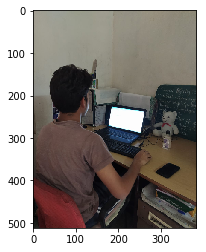

In [4]:
image_path = "F:\Spark foundation\Object Detection\My_Table.jpeg"

image = plt.imread(image_path)
image = cv2.resize(image,None,fx=0.4,fy=0.4)
height,width,channels = image.shape 

print("Shape of image: ",image.shape)
plt.imshow(image)
plt.show() 

### Blobing image: 
BLOB stands for Binary Large OBject and refers to a group of connected pixels in a binary image.
##### cv2.dnn.blobFromImage  do:
<ol>
    <li>Mean substraction. </li>
    <li>Scaling. </li>
    <li>And optionally channel swapping. </li>
</ol>
It creates 4-dimensional blob from image. Optionally resizes and crops image from center, subtract mean values, scales values by scalefactor, swap Blue and Red channels.

Shape of blob:  (1, 3, 416, 416)


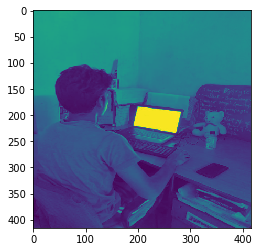

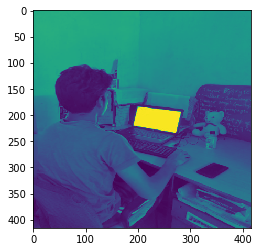

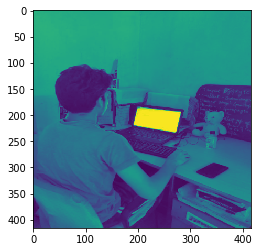

In [5]:
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop = False)
print("Shape of blob: ",blob.shape) 
for b in blob:
    for n,img_blob in enumerate(b):
        plt.imshow(img_blob)
        plt.show()
        
net.setInput(blob)
outs = net.forward(output_layers)                     # output list of size 3

### Getting all the boxes detected by Yolo by a threshold value of 0.4: 

In [6]:
boxes = []
confidences = []
class_ids = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id] 
        if confidence > 0.4:
            
            #Object detected
            
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            #cv2.circle(image, (center_x, center_y), 10, (0, 0, 255), 2)         (To get circle around object.)
            
            #Rectangle Coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)
            

In [7]:
for obj in range(len(boxes)):
    print(classes[class_ids[obj]]) 

laptop
laptop
person
person
laptop
person
person
person
chair
teddy bear
teddy bear
teddy bear
keyboard


### Using NON-max suppression(NMS) and Intersection over Union (IoU): 
 
IoU = area of overlap / area of Union

In [8]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)        # Indexes which we need to take to avoid duplicates
colors = np.random.uniform(0, 255, size = (len(classes), 3)) 
print("Total number of objects detected: ",len(indexes))

for box in range(len(boxes)):
    if box in indexes: 
        x, y, w, h = boxes[box]
        label = str(classes[class_ids[box]])
        print("Labels of the Object detected is:", label)
        color = colors[box]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x+3, y + 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2) 

Total number of objects detected:  3
Labels of the Object detected is: laptop
Labels of the Object detected is: person
Labels of the Object detected is: teddy bear


### Display result: 

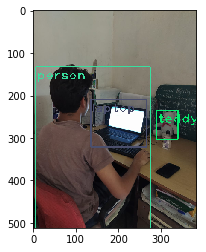

In [11]:
#cv2.imshow("my_table_image",image)
#cv2.waitKey(0)  
#cv2.destroyAllWindows()


plt.imshow(image)
plt.show()

#####  Object detection completed on image clicked by my phone.